## Import The Libraries and Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')
import re
from datetime import datetime
plt.rcParams["figure.figsize"] = (10,6)

### Load the data sets

In [2]:
df_twint = pd.read_csv('Data\Twint\All_data_twint.csv' , index_col=0)
df_tweepy1 = pd.read_csv('Data\Tweepy\All_data_tweep.csv' , index_col=0)
df_tweepy2 = pd.read_csv('Data\Tweepy\All_data17_4.csv' , index_col=0)
df_tweepy3 = pd.read_csv('Data\Tweepy\All_data23_4.csv' , index_col=0)

Concatanate the tweepy tabels :

In [3]:
df_tweepy =pd.concat([df_tweepy1 , df_tweepy2 , df_tweepy3], ignore_index=True)

Data summary

In [4]:
df_twint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 0 to 2591
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2592 non-null   int64  
 1   conversation_id  2592 non-null   int64  
 2   created_at       2592 non-null   object 
 3   date             2592 non-null   object 
 4   time             2592 non-null   object 
 5   timezone         2592 non-null   int64  
 6   user_id          2592 non-null   int64  
 7   username         2592 non-null   object 
 8   name             2592 non-null   object 
 9   place            1 non-null      object 
 10  tweet            2592 non-null   object 
 11  language         2592 non-null   object 
 12  mentions         2592 non-null   object 
 13  urls             2592 non-null   object 
 14  photos           2592 non-null   object 
 15  replies_count    2592 non-null   int64  
 16  retweets_count   2592 non-null   int64  
 17  likes_count   

In [5]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tweets       1294 non-null   object 
 1   created_at   1294 non-null   object 
 2   geo          0 non-null      float64
 3   coordinates  0 non-null      float64
 4   place        53 non-null     object 
 5   lang         1294 non-null   object 
 6   entities     1294 non-null   object 
dtypes: float64(2), object(5)
memory usage: 70.9+ KB


In [6]:
#Drop unnecessary columns
df_twint = df_twint[['tweet' ,'created_at' ]]
df_tweepy = df_tweepy[['Tweets' , 'created_at']]

#Rename df_twint columns 
df_twint.rename(columns={'tweet': 'Tweets'} , inplace=True)


Concatanate the tabels :

In [7]:
df =pd.concat([df_tweepy , df_twint], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweets      3886 non-null   object
 1   created_at  3886 non-null   object
dtypes: object(2)
memory usage: 60.8+ KB


'created_at' must be datetime so we will clean it

In [8]:
for i in range(0, len(df)):
    df['created_at'][i]= re.sub(r"[a-z]", "", df['created_at'][i], flags=re.I).strip()
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at']

0      2021-04-10 23:31:45
1      2021-04-10 22:50:24
2      2021-04-10 22:43:19
3      2021-04-10 22:38:09
4      2021-04-10 22:32:11
               ...        
3881   2021-03-16 10:39:54
3882   2021-03-14 04:34:10
3883   2021-03-10 21:50:35
3884   2021-03-05 17:16:51
3885   2021-03-05 17:15:21
Name: created_at, Length: 3886, dtype: datetime64[ns]

Check there are no duplicate Tweets

In [9]:
df.drop_duplicates(subset=['Tweets'] , inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tweets      2442 non-null   object        
 1   created_at  2442 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 38.3+ KB


The overall distribution of length of each tweet

In [10]:
pre_clean_len = [len(t) for t in df.Tweets]

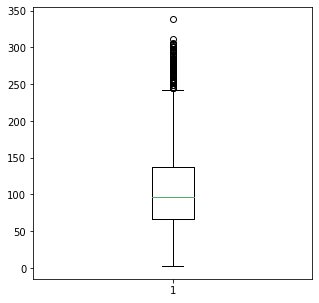

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(pre_clean_len)
plt.savefig('Boxplot.png')
plt.show()

This looks a bit strange, since the twitter's character limit is 140. But from the above box plot, some of the tweets are way more than 140 chracters long.

Now we will look at the distribution of tweets over time

In [13]:
df['created_at']

0      2021-04-10 23:31:45
1      2021-04-10 22:50:24
2      2021-04-10 22:43:19
3      2021-04-10 22:38:09
4      2021-04-10 22:32:11
               ...        
2437   2021-04-06 03:00:58
2438   2021-04-06 03:00:20
2439   2021-04-06 03:00:09
2440   2021-04-06 03:00:05
2441   2021-04-06 03:00:00
Name: created_at, Length: 2442, dtype: datetime64[ns]

In [23]:
grouped = df.set_index('created_at').groupby(pd.Grouper(freq='M')).count()
grouped

,Tweets
created_at,
2020-01-31,142
2020-02-29,82
2020-03-31,87
2020-04-30,0
2020-05-31,3
2020-06-30,0
2020-07-31,0
2020-08-31,0
2020-09-30,0


In [24]:
grouped.index=grouped.index.to_series().apply(lambda x : x.strftime("%Y/%m"))

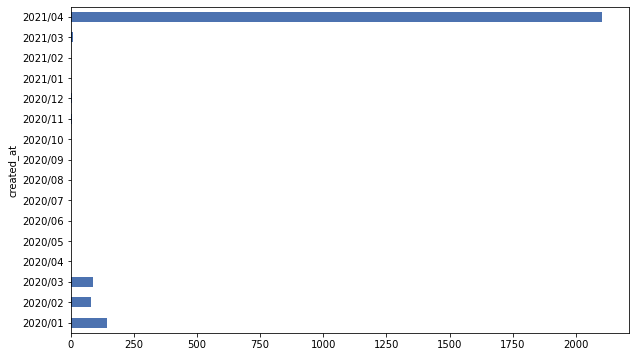

In [25]:
grouped['Tweets'].plot(kind='barh')
plt.savefig('Barplot.png')
plt.show()

Saving data as csv

In [26]:
df.created_at=df.created_at.apply(lambda x : x.strftime("%Y/%m"))

In [27]:
df.head()

,Tweets,created_at
0,الهواري: اللقاح منع تصاعد الحالة الوبائية وموج...,2021/04
1,صحة إربد: 100 ألف شخص تلقوا اللقاح وإقبال متزا...,2021/04
2,@Sarsak24 @khaberni انا وجهة نظري ، الحل الافض...,2021/04
3,@alialasmar89 @khaberni لا تخاطر يا اخ خذ اللق...,2021/04
4,RT @Dr_abdoty: ليش ناخذ اللقاح؟\nشنو الهدف منه...,2021/04


In [28]:
df.to_csv('tweet.csv',index=False, encoding='utf-8')